# Multiple Logistic Regression

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import statsmodels.api as sm

1. Load the `kc_housing_data.csv` dataset from the `data` folder to a new DataFrame named `df`. The data set contains data relative to *home sales prices and characteristics for Seattle and King County, WA between May 2014 and 2015

In [2]:
df = pd.read_csv("data/kc_housing_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#"Convert the 'date' column to datetime format."
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

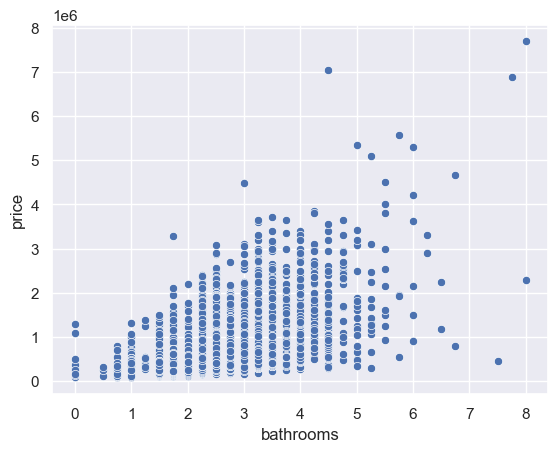

In [6]:
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.show()

2. Disign and fit a multiple linear regression model, using `price` as the dependent variable and the following predictors `['bedrooms', 'bathrooms', 'view', 'grade']`. Produce the usual summary output. 
    1. Is the resulting model fitting well the data? 
    2. Are all the predictor's coefficients statistically significant? 
    3. Is there multicollinearity between the regressors?

In [7]:
Y = df['price']
X = df[['bedrooms','bathrooms','view','grade']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5708.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        18:06:20   Log-Likelihood:            -2.9981e+05
No. Observations:               21613   AIC:                         5.996e+05
Df Residuals:                   21608   BIC:                         5.997e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.937e+05    1.3e+04    -68.898      0.000   -9.19e+05   -8.68e+05
bedrooms    1.855e+04   2186.988      8.484      0.000    1.43e+04    2.28e+04
bathrooms   5.401e+04   3304.360     16.346      0.000    4.75e+04    6.05e+04
view        1.164e+05   2349.627     49.556      0.000    1.12e+05    1.21e+05
grade       1.606e+05   2014.564     79.722      0.000    1.57e+05    1.65e+05
==============================================================================
Omnibus:                    18992.884   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1893016.549
Skew:                           3.778   Prob(JB):                         0.00
Kurtosis:                      48.222   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The model is fitting the data quite well with an $R^2 = 0.531$. All the regression coefficients are statistically significant with their p-values being all closes to zero and, in any case, lower than the threshold significance level of $\alpha = 0.05$. There is no multicollinearity between the independent variables, being the Condition Number relatively low. 

3. Feature engineering: create a new feature `is_renovated` that is $1$ if the house has been renovated and $0$ otherwise. Add this new feature as a predictor to the previous model. Has the model's fit improved? 

In [9]:
df['is_renovated'] = [1 if el > 0 else 0 for el in df.yr_renovated]
df.sample(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
11784,1823049046,2014-08-06,240000.0,2,1.50,1670,9880,1.0,0,0,...,1670,0,1941,1963,98146,47.4864,-122.348,1670,9807,1
14161,7660100085,2014-09-08,750000.0,5,2.75,2860,6000,2.5,0,0,...,2380,480,1902,0,98144,47.5906,-122.316,2240,6000,0
13587,1081200360,2014-08-06,260000.0,3,1.75,1750,11180,1.0,0,0,...,1750,0,1968,0,98059,47.4713,-122.117,1730,11180,0
2343,5634500036,2014-08-20,459000.0,5,2.50,2650,12987,1.0,0,0,...,1350,1300,1979,0,98028,47.7482,-122.244,2160,12726,0


In [10]:
Y = df['price']
X = df[['bedrooms','bathrooms','view','grade','is_renovated']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     4709.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        18:07:08   Log-Likelihood:            -2.9964e+05
No. Observations:               21613   AIC:                         5.993e+05
Df Residuals:                   21607   BIC:                         5.993e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.061e+05   1.29e+04    -70.318      0.000   -9.31e+05   -8.81e+05
bedrooms      1.878e+04   2169.733      8.655      0.000    1.45e+04     2.3e+04
bathrooms     5.095e+04   3282.351     15.524      0.000    4.45e+04    5.74e+04
view           1.12e+05   2343.360     47.783      0.000    1.07e+05    1.17e+05
grade         1.622e+05   2000.519     81.089      0.000    1.58e+05    1.66e+05
is_renovated   1.61e+05   8644.471     18.621      0.000    1.44e+05    1.78e+05
==============================================================================
Omnibus:                    18917.249   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1839698.818
Skew:                           3.761   Prob(JB):                         0.00
Kurtosis:                      47.568   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Let's say you own a house in King County, WA that has 4 bedrooms, 2 bathrooms and it has no particuar view. Its construction grade is 8 and it has been recently renovated. How much could you sell it for according to your last model?

In [11]:
pred_price = results_mr.predict(np.array([1,4,2,0,8,1]))
print('Predicted price of house:', int(pred_price[0]), 'USD')

Predicted price of house: 729642 USD


5. Using the previous model as the starting point, add the `sqft_lot` variable as a new predictor, estimate the new model and produce the usual summary output. Has the model's fit improved? How has this impacted the Condition Number of the model? Why do you think this is? 

In [12]:
Y = df['price']
X = df[['bedrooms','bathrooms','view','grade','is_renovated', 'sqft_lot']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3924.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        18:07:27   Log-Likelihood:            -2.9964e+05
No. Observations:               21613   AIC:                         5.993e+05
Df Residuals:                   21606   BIC:                         5.993e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -9.06e+05   1.29e+04    -70.268      0.000   -9.31e+05   -8.81e+05
bedrooms      1.879e+04   2170.069      8.659      0.000    1.45e+04     2.3e+04
bathrooms     5.093e+04   3283.096     15.513      0.000    4.45e+04    5.74e+04
view          1.119e+05   2345.984     47.713      0.000    1.07e+05    1.17e+05
grade         1.622e+05   2004.862     80.891      0.000    1.58e+05    1.66e+05
is_renovated   1.61e+05   8644.648     18.620      0.000    1.44e+05    1.78e+05
sqft_lot         0.0145      0.042      0.346      0.729      -0.068       0.097
==============================================================================
Omnibus:                    18919.522   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1840400.254
Skew:                           3.762   Prob(JB):                         0.00
Kurtosis:                      47.576   Cond. No.                     3.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The model's fit has not improved after adding the `sqft_lot` variable to the equation. Also, the Condition Number has increased dramatically, indicating potential multicollinearity between the predictors. This is probably due to the fact that the number of bedrooms/bathrooms in a house is a proxy of the house's size, therefore these two variables are likely to be correlated to the total squared feet of the house. 

6. Using the model defined in question 3, split the dataset into two training and test subsets, where 33% of the available data should be used for testing (use `random_state=42` to make the results replicable). Then: 
    1. Fit the model to the training split
    2. Calculate the MAE for the training model
    3. Use the testing data to predict the response variable `y_test` using the model you just fitted 
    4. Calculate the MAE for the test model
    5. Would you say that the model you trained is overfitting the data? 
    6. Given the MAE results, are you happy with the model? Would you trust its predictions? If not, what would you do to improve the model? 

In [ ]:
y = df['price']
X = df[['bedrooms','bathrooms','view','grade','is_renovated']]
X = sm.add_constant(data=X)   # add a constant to the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = sm.OLS(endog=y_train,exog=X_train)
results = model.fit()
results.summary()

In [ ]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [ ]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

In [ ]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

> No, the model is not overfitting the data, since the Training and Testing errors are not too far off from each other. 

> I wouldn't put too much trust on this particular model, more work needs to be done in terms of feature engineering and selection in order to increase the goodness of fit to the data, so I would keep testing more variables to increase the R-squared and reduce the MAE. Being a more complez dataset, another option would be to test more advanced regression algorithms and include categorical variables as predictors. 

7. Define two new functions `mape()` and `rmse()` that calculate the Mean Absolute Percentage Error and the Root Mean Squared Error respectively. Read about [their differences](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide) and use them on the training and testing predictions from question 7. 

In [ ]:
# other accuracy metrics

# Mean Absolute Percentage Error (MAPE)
def mape(y, pred): 
    return round(np.mean(np.abs((y - pred)/y))*100, 2)

# Root Mean Squared Error (RMSE)
def rmse(y, pred):
    return round(np.sqrt(np.mean((y - pred)**2)), 2)

In [ ]:
print('Training MAPE:', mape(y_train, pred_train), '%')
print('Testing MAPE:', mape(y_test, pred_test), '%') 

print('Training RMSE:', rmse(y_train, pred_train))
print('Testing RMSE:', rmse(y_test, pred_test)) 

9. Can you improve the model further by trying to include more features (maintaining all coefficients statistically significant and keeping multicollinearity at bay)? 

In [ ]:
y = df['price']
X = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'is_renovated']]
X = sm.add_constant(data=X)   # add a constant to the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = sm.OLS(endog=y_train,exog=X_train)
results = model.fit()
results.summary()

In [ ]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(pred_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

In [ ]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(pred_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae